## 图文并茂：揭秘OPENAI的多模态模型4o的图像API调用

gpt-4o 可以在请求中同时处理文本和图像。要将图像传递给 gpt-4o，需要在`messages`的 `content` 字段中正确格式化图像数据。
注意gpt-4o并不能生成图像，gpt-4o 、 gpt-4o-mini或gpt-4-turbo可以理解图像，但生成图像是使用OPEN AI的dall-e-3模型，并是另外的API，另外的函数及用法。

有两种主要图片来源的读取与处理方法：

1. 从本地文件系统读取图像，要将本地图像传递给 gpt-4o，我们需要将图像内容转换为 base64 编码的字符串。
2. 从互联网 URL 获取在线图像，注意ulr的后缀应该为图片的格式，例如"https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"

**图像数据处理秘笈：base64 编码的奥秘**

为何要将图像数据转换成base64传递给 gpt-4o

- **二进制数据**：图像文件以二进制形式存储像素信息。每个像素通常由红、绿、蓝（RGB）三个颜色通道的值组成。
- **Base64 编码**：将二进制数据转换为由 64 个特定字符组成的字符串。这些字符包括大写 A-Z、小写 a-z、数字 0-9、加号 + 和斜杠 /。Base64 编码确保数据可以在文本处理系统中安全传输。

在 API 请求的 `messages` 的content部分，使用以下结构来包含图像：
```json
{
    "content": [
            {"type": "text", "text": "请描述这张图片。"},
            {"type": "image_url", "image_url": {
              "url": f"data:image/png;base64,{base64_image}"}
            }
        ]
    

    "content": [
                {"type": "text", "text": "What's the area of the triangle?"},
                {"type": "image_url", "image_url": {
                    "url": "https://wikimedia/e/e2/page_82b.png"}
                }
            ]
}
```
字段及其值的说明
-
- `type`: 指定数据类型，对于图像应设置为 "image_url"。
- `image_url`： 
   媒体类型，指定具体的图像格式,目前支持PNG (.png)、JPEG（.jpeg 和 .jpg）、WEBP (.webp) 和非动画 GIF (.gif)
   源数据类型，即"base64"
   base64 编码的图像数据。
 

导入库并初始化一个client

In [4]:
from openai import OpenAI
# 如果成功配置了环境变量的在OPENAI提供的工具包中会自动找到我们的秘钥
client = OpenAI()
# 如果没有配置环境变量也可以用变量显式传入
# client = OpenAI(api_key="bjhgsdjhfkad_your_api_key_here") 

GPT-4o和GPT-4o mini 可以直接处理图像，并根据图像采取智能行动。我们接下来分别尝试处理两种格式的图像：

Base64 编码
URL

我们先查看将要使用的图像，然后尝试将此图像作为 Base64 和 URL 链接发送到 API

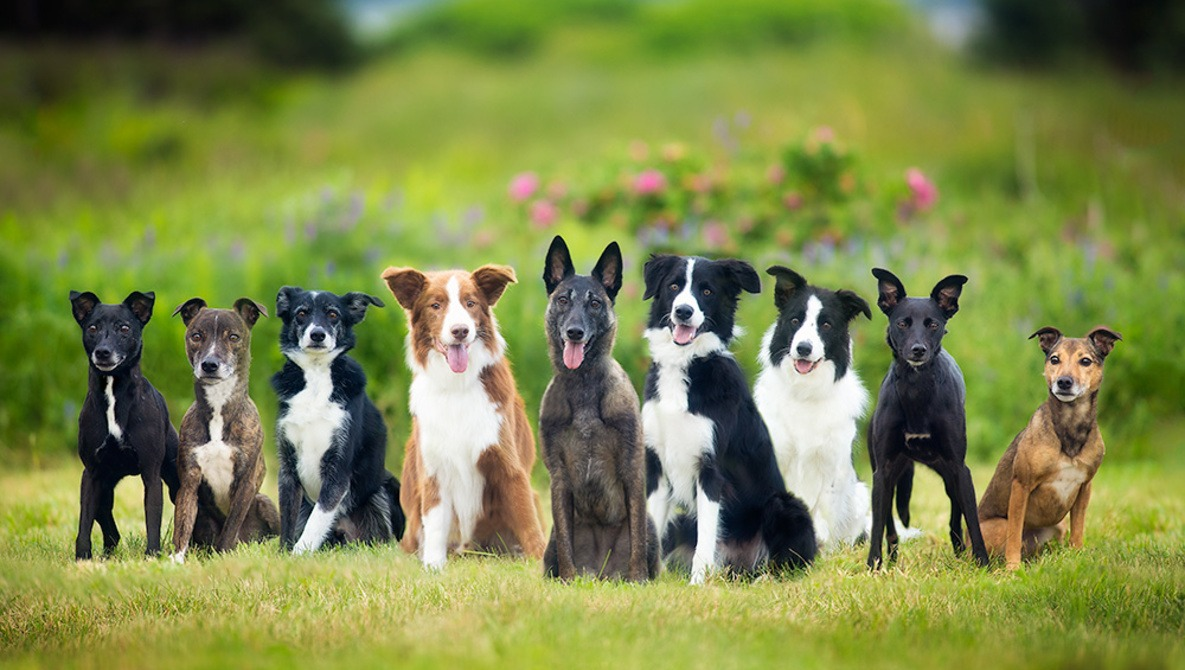

In [7]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "data/nine_dogs.jpg"

# Preview image for context
display(Image(IMAGE_PATH))

Base64 图像处理

In [8]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown."},
        {"role": "user", "content": [
            {"type": "text", "text": "图片里有几只狗，是什么品种的狗，他们的寿命一般是多久"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
)

print(response.choices[0].message.content)

图片中有九只狗。看起来有几只是边境牧羊犬（Border Collie）。边境牧羊犬的平均寿命通常在12到15年之间。其他狗的品种不太明确，可能是混种犬，具体寿命会因品种和健康状况而异。


In [23]:
base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wgARCAKeBKEDASIAAhEBAxEB/8QAHQAAAgIDAQEBAAAAAAAAAAAAAwQCBQEGBwAICf/EABsBAAIDAQEBAAAAAAAAAAAAAAIDAAEEBQYH/9oADAMBAAIQAxAAAAH5bzjMhpQnLGIorr0sZqFmKVTMc+qs+jiSWYSkKQOZbGQyqSCSFyJIzoc5x6p7HoSFIsSUxIRhr2S5q4GHKo2evOFPGVaAW7KssSTc3NHfbM9pZAu9ili2+Surk6BECPKeWEXAphpyFcLmXa5qJco7WNdnCT+FMhbXl/SMDhCSUMYYOI4g6sDyJ9TwKLJLAYNhyKeOrFyqdVLdyrayts5IzSTkFgojAACTTMV43R4rYOmsLQuM+TGdPYQjd2Xq/Ix3NfIrssoesnghxVEwtm6dZrSUdqSqK87PChe3RQl93lgy6z0BpV9hVfWt12y1VTUte3LV8jNfScrlN9AcITGQTCzZjkYeQp0UVmljJeEhHcQlhLFGfpcZ5mNQnkkGZvHXBeP4ZrviZeeCQzd4EeEg8kzUHmXimM+zUx4k5BZLGSOPYlFLA1EODApQpY9KlHPpY8GxKGXJ5MM4MofElNcDBmMi884IWj15hq0cpzhWybHpOyEne9j0zY2q2SdPKRmuHV4aaQUTwiwksqFNCShV2Ra8ue3pokzVYSQyqrDNfmrf9W+qWvkGAIkpGJi8X/Gdbiywcqx3ESqn9axsUDMeWESjxnprCg1R/FfmU55XEpiI4HC4DBsaGKJXkPhPrAoAeTkkTDbWQSkdyOdWXMcpgcR

 URL 图像处理

In [10]:
from IPython.display import Image, display

# 图片的URL
image_url = "https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20241015154823.png"

# 显示URL图片
display(Image(url=image_url))


In [9]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that good at in LLM and openai API"},
        {"role": "user", "content": [
            {"type": "text", "text": "帮我写出用openai调用的代码并讲解，让小学生也能听懂"},
            {"type": "image_url", "image_url": {
                "url": "https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20241015154823.png"}
            }
        ]}
    ],
    temperature=0.0,
)

from IPython import display
display.Markdown(response.choices[0].message.content)

要用OpenAI的API来和AI聊天，我们可以写一个简单的程序。这个程序会不断地问你问题，然后用AI来回答。下面是一个简单的代码示例，并且我会用小学生能懂的方式来解释。

```python
import openai

# 设置API密钥
openai.api_key = '你的API密钥'

# 初始化一个空的消息列表
messages = []

while True:
    # 获取用户的输入
    user_input = input("你想说什么？")

    # 将用户的输入添加到消息列表中
    messages.append({"role": "user", "content": user_input})

    # 调用模型生成回复
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    # 获取AI的回复
    ai_reply = response['choices'][0]['message']['content']

    # 将AI的回复添加到消息列表中
    messages.append({"role": "assistant", "content": ai_reply})

    # 打印AI的回复
    print("AI说:", ai_reply)
```

### 解释

1. **设置API密钥**：就像你需要钥匙才能打开家门，我们需要一个API密钥来使用OpenAI的服务。

2. **初始化消息列表**：我们用一个空的列表来存储所有的对话，就像一个聊天记录本。

3. **循环**：这个程序会一直运行，直到你手动停止。每次循环都会问你一个问题。

4. **获取用户输入**：程序会问你“你想说什么？”，然后你可以输入你的问题或话题。

5. **添加用户输入到消息列表**：把你说的话记下来，放到我们的聊天记录本里。

6. **调用模型生成回复**：用OpenAI的模型来生成AI的回答。

7. **获取AI的回复**：从OpenAI那里得到AI的回答。

8. **添加AI的回复到消息列表**：把AI的回答也记下来，放到聊天记录本里。

9. **打印AI的回复**：把AI的回答显示给你看。

这样，你就可以和AI进行一场有趣的对话啦！

### 图文并茂，多模态的最佳实践

**控制低分辨率传入与高分辨率传入图片的参数——detail**

- 图像输入按token计费,类似文本输入成本由图像大小和detail参数决定

2. detail参数选项:
   - low: 低分辨率模式
   - high: 高分辨率模式
   - auto: 自动选择模式(默认)

3. 各模式特点:
   - low低分辨率模式:
     * 图像缩放至512px x 512px
     * 固定成本85 tokens
     * 适合不需要高细节的快速处理
   
   - high高分辨率模式:
     * 先处理低分辨率版本(85 tokens)
     * 然后处理高分辨率细节，将图像缩放至2048x2048正方形内
     * 每512px x 512px区块170 tokens
     * 每区块170 tokens + 基础85 tokens,即最后总是额外加85 tokens
      - 一张1024x1024 (high)模式下的图片的token计算过程。让我们一步步来:
        1. 初始图像大小检查:
           - 图像尺寸是1024x1024
           - 小于2048x2048的最大限制,所以不需要初始缩放
        
        2. 调整到768像素:
           - 规则是将最短边调整为768像素
           - 1024 > 768,所以需要缩小
           - 新尺寸变为768x768
        
        3. 计算512px的方块数量:
           - 768x768的图像需要被分割成512px的方块
           - 768除以512 = 1.5,向上取整为2
           - 所以在每个维度上需要2个方块
           - 总共需要2x2 = 4个512px的方块
        
        4. 计算token:
           - 每个512px方块消耗170 tokens
           - 4个方块: 4 * 170 = 680 tokens
           - 基础费用: 85 tokens
           - 总计: 680 + 85 = 765 tokens

            因此,1024x1024的高分辨率图像最终需要765个tokens。

   - auto模式:
     * 系统根据输入图像大小自动选择low或high

5. 示例:
   - 1024x1024 (high): 765 tokens
   - 2048x4096 (high): 1105 tokens
   - 任何大小 (low): 85 tokens

最佳实践：

- 通过提前将图像尺寸缩小到小于预期的最大尺寸来改善模型的延迟。例如低分辨率模式提前调整为 (512x512像素)；高分辨率提前缩放至2048x2048就，即图像的短边应小于 768 像素，长边应小于 2,000 像素。
- 对于长时间运行的对话，建议通过 URL 而不是 base64 传递图像。

In [24]:
from IPython.display import Image, display

# 图片的URL
image_url = "https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/%E5%8E%8B%E7%BC%A9_%E6%89%8B%E5%86%99%E7%85%A7%E7%89%87.jpg"

# 显示URL图片
display(Image(url=image_url))

In [14]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant。"},
        {"role": "user", "content": [
            {"type": "text", "text": "请描述这张照片"},
            {"type": "image_url", "image_url": {
                "url": "https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/%E5%8E%8B%E7%BC%A9_%E6%89%8B%E5%86%99%E7%85%A7%E7%89%87.jpg"}
            }
        ]}
    ],
)
print(response)
from IPython import display
display.Markdown(response.choices[0].message.content)

ChatCompletion(id='chatcmpl-AJFKYYur2egyaBwnGYHJNrC1Mz8CO', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='照片中是一张棕色的纸，上面用笔写着一句话：“赋能课堂 为每个人提供最有价值的技术赋能”。文字位于纸的右侧，背景相对简单没有其他明显的特征。', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1729150526, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_a20a4ee344', usage=CompletionUsage(completion_tokens=52, prompt_tokens=787, total_tokens=839, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))


照片中是一张棕色的纸，上面用笔写着一句话：“赋能课堂 为每个人提供最有价值的技术赋能”。文字位于纸的右侧，背景相对简单没有其他明显的特征。

In [15]:
print(response.usage)

CompletionUsage(completion_tokens=52, prompt_tokens=787, total_tokens=839, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0))


In [17]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant。"},
        {"role": "user", "content": [
            {"type": "text", "text": "请描述这张照片"},
            {"type": "image_url", "image_url": {
                "url": "https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/%E5%8E%8B%E7%BC%A9_%E6%89%8B%E5%86%99%E7%85%A7%E7%89%87.jpg",
                "detail": "low"
            }
            }
        ]}
    ],
)
print(response)
from IPython import display
display.Markdown(response.choices[0].message.content)

ChatCompletion(id='chatcmpl-AJFL9LIgB4PIvmULpi6lZg9xpiqu8', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='照片上是一张纸，上面写着：“赋能课堂，为每个人提供最有价值的技术赋能。”', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1729150563, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_a20a4ee344', usage=CompletionUsage(completion_tokens=25, prompt_tokens=107, total_tokens=132, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))


照片上是一张纸，上面写着：“赋能课堂，为每个人提供最有价值的技术赋能。”

In [18]:
print(response.usage)

CompletionUsage(completion_tokens=25, prompt_tokens=107, total_tokens=132, completion_tokens_details=CompletionTokensDetails(audio_tokens=None, reasoning_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0))


多图对话：提升交互体验的进阶技巧

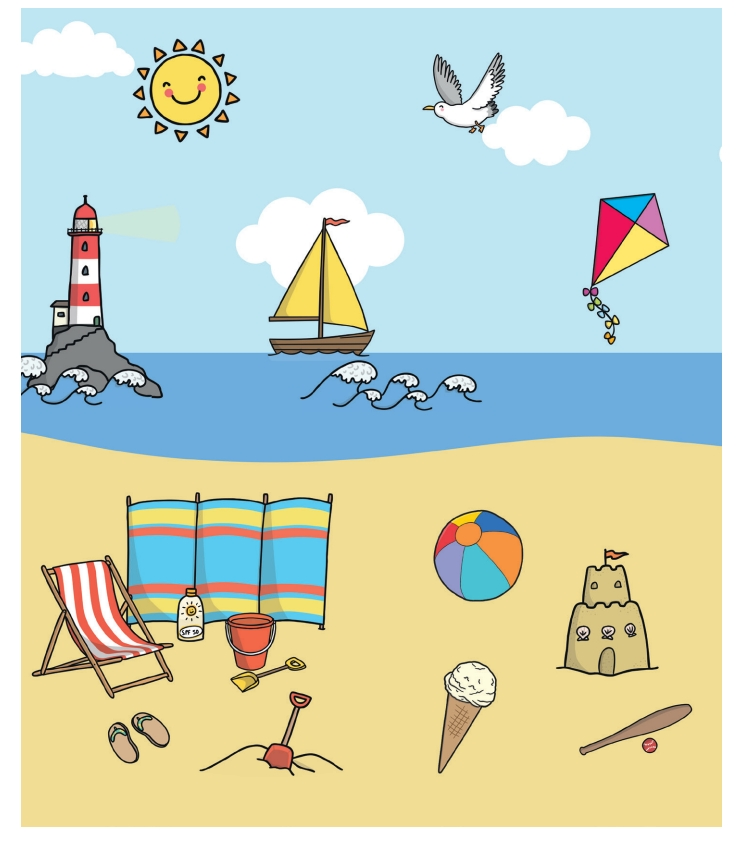

In [25]:
from IPython.display import Image
Image(filename='data/spot_diff1.jpg') 

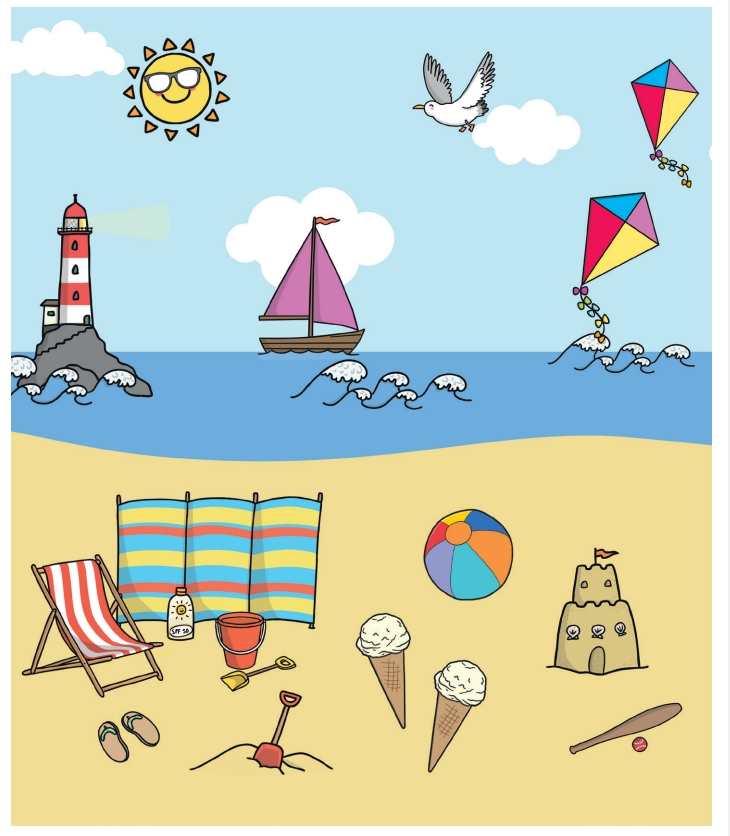

In [26]:
from IPython.display import Image
Image(filename='data/spot_diff2.jpg') 

In [30]:
from openai import OpenAI

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image1 = encode_image("data/spot_diff1.jpg")
base64_image2 = encode_image("data/spot_diff2.jpg")

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "找不同，多处，尽可能多，仔细",
        },
         {"type": "image_url", "image_url": {
                "url": f"data:image/jpg;base64,{base64_image1}"}
         },
          {
          "type": "text",
          "text": "第二个图像",
        },
        {"type": "image_url", "image_url": {
                "url": f"data:image/jpg;base64,{base64_image2}"}
        },
      ],
    }
  ],
  max_tokens=300,
)
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='以下是这两幅图片的不同之处：\n\n1. **帆船颜色**：\n   - 第一幅：帆船是黄色的。\n   - 第二幅：帆船是紫色的。\n\n2. **太阳的表情**：\n   - 第一幅：太阳的表情是微笑的。\n   - 第二幅：太阳的表情也是微笑，但颜色略有不同。\n\n3. **冰淇淋的数量**：\n   - 第一幅：只有一个冰淇淋。\n   - 第二幅：有两个冰淇淋。\n\n4. **遮阳伞的颜色**：\n   - 第一幅：伞的条纹为红色和蓝色。\n   - 第二幅：伞的条纹为红色和蓝色，但排列的顺序略有不同。\n\n5. **沙铲的颜色**：\n   - 第一幅：沙铲是红色的。\n   - 第二幅：沙铲是黄色的。\n\n6. **海浪的形状**：\n   - 第一幅：海浪的形状有小波浪。\n   - 第二幅：海浪形状略有不同，波浪的数量变化。\n\n7. **足球棒的位置**：\n   - 第一幅：棒球的位置偏左。\n   - 第二幅：棒球的位置稍微偏右。\n\n希望这些不同之处能够帮助到你！', refusal=None, role='assistant', function_call=None, tool_calls=None))


In [29]:
response.choices[0].message.content

'在这两幅图像中，可以找到以下不同点：\n\n1. **太阳**：第一幅图的太阳有一个小笑脸，而第二幅图的太阳的笑脸是不同的。\n2. **船的颜色**：第一幅图中船的帆是黄色的，而第二幅图中的船帆是紫色的。\n3. **冰淇淋**：第一幅图中只有一个冰淇淋，而第二幅图中有两个冰淇淋。\n4. **沙滩桶**：第一幅图中沙滩桶是红色的，第二幅图中是蓝色的。\n5. **沙滩椅**：第一幅图中的沙滩椅摆放有些不同，第二幅图中沙滩椅的位置有所变化。\n6. **风筝的数量**：第一幅图上方只有一个风筝，而第二幅图中有两个风筝。\n7. **沙子铲子**：第一幅图中的沙子铲子是红色的，第二幅图中是黄色的。\n8. **海浪的形状**：两幅图中海浪的形状有些细微差别。\n\n这些是观测到的不同之处！'